In [1]:
import pickle
import numpy as np

In [2]:
models = {}

In [3]:
#model_names = ('LRGCN', 'DCRNN', 'DyGrEncoder', 'GConvLSTM', 'GConvGRU', 'GCLSTM', 'TGCN')

In [1]:
model_names = ('SC_census')

In [ ]:
for model_name in model_names:
    with open('/home/mxenoc/workspace/covid-CA-forecasting/results/'+ model_name +'.pkl', 'rb') as f:
        models[model_name] = pickle.load(f)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
f = plt.figure(figsize=(4.5, 3.5))

plt.axhline(y=3.45, color='r', linestyle='--', label="Naive")
plt.plot(models[LRGCN], label="LRGCN", color='pink')
plt.plot(models[DCRNN], label="DCRNN", color='crimson')
plt.plot(models[DyGrEncoder], label="DyGrEncoder", color='palevioletred')
plt.plot(models[GConvLSTM], label="GConvLSTM", color='cadetblue')
plt.plot(models[GConvGRU], label="GConvGRU", color='cornflowerblue')
plt.plot(models[GCLSTM], label="GCLSTM", color='salmon')
plt.plot(models[TGCN], label="TGCN", color='lightskyblue')

plt.xlabel("# Epoch")
plt.ylabel("MSE (cases per 1000 residents)")
plt.legend(loc='upper right')
plt.draw()
os.chdir('/home/mxenoc/workspace/RISE')
plt.savefig('model_comparison_RISE.png', dpi=500, bbox_inches='tight')

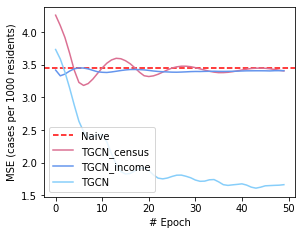

In [47]:
import matplotlib.pyplot as plt
import numpy as np
import os
f = plt.figure(figsize=(4.5, 3.5))

plt.axhline(y=3.45, color='r', linestyle='--', label="Naive")
plt.plot(models['TGCN_census'], label="TGCN_census", color='palevioletred')
plt.plot(models['TGCN_income'], label="TGCN_income", color='cornflowerblue')
plt.plot(models['TGCN'], label="TGCN", color='lightskyblue')

plt.xlabel("# Epoch")
plt.ylabel("MSE (cases per 1000 residents)")
plt.legend(loc='lower left')
plt.draw()
os.chdir('/home/mxenoc/workspace/RISE')
plt.savefig('TGCN_comparison_RISE.png', dpi=500, bbox_inches='tight')

In [ ]:
y_pos = [models['TGCN'][-1], models['DCRNN'][-1], models['DyGrEncoder'][-1], models['GConvLSTM'][-1], 
         models['GConvGRU'][-1], models['GCLSTM'][-1], models['TGCN'][-1]]
predictors = ['LRGCN', 'DCRNN', 'DyGrEncoder', 'GConvLSTM', 'GConvGRU', 'GCLSTM', 'TGCN']

In [ ]:
f = plt.figure(figsize=(3.5, 2.5))
plt.axhline(y=3.45, color='r', linestyle='--', label="Naive")
plt.bar(predictors, y_pos, color=['pink', 'crimson', 'palevioletred', 'cadetblue', 'cornflowerblue', 'salmon','lightskyblue'])
plt.xlabel('Model')
plt.ylabel('MSE (cases per 1000)')
plt.title('Prediction performance')
plt.xticks(rotation=45)
#plt.show()

os.chdir('/home/mxenoc/workspace/RISE')
plt.savefig('model_comparison_bars.png', dpi=500, bbox_inches='tight')

In [4]:
#model_names = ('Census_train_11_02', 'Census_test_11_02')
model_names = ('Census_test_09_02', 'Census_test_10_02', 'Census_test_11_02', 'Census_test_12_02', 
              'Census_test_13_02', 'Census_test_14_02',
              'Census_test_09_02_NoC', 'Census_test_10_02_NoC', 'Census_test_11_02_NoC', 'Census_test_12_02_NoC', 
              'Census_test_13_02_NoC', 'Census_test_14_02_NoC')

In [49]:
#'/home/mxenoc/workspace/covid-CA-forecasting/results/'+ model_name +'.pkl'

with open('/home/mxenoc/workspace/covid-CA-forecasting/results/'+ model_name +'.pkl', 'rb') as f:
    model = pickle.load(f)

In [5]:
for model_name in model_names:
    with open('/home/mxenoc/workspace/covid-CA-forecasting/results/'+ model_name +'.pkl', 'rb') as f:
        models[model_name] = pickle.load(f)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
f = plt.figure(figsize=(4.5, 3.5))

#plt.plot(model, label="Census_train_11_02", color='palevioletred')
#plt.plot(model, label="Census_train_11_02", color='palevioletred')
plt.plot(model, label="SC_Census", color='palevioletred')

plt.xlabel("# Epoch")
plt.ylabel("MSE (cases per 1000 residents)")
plt.legend(loc='lower left')
plt.draw()
#os.chdir('/home/mxenoc/workspace/RISE')
#plt.savefig('TGCN_comparison_RISE.png', dpi=500, bbox_inches='tight')

In [28]:
import seaborn as sns
import pandas as pd

In [16]:
t=sns.load_dataset('tips')

In [ ]:
errors = []
for model_name in model_names:
    errors.append(np.round(models[model_name][-1],3))
    
errors.append(0.1704)
errors.append(0.1452)
errors.append(0.1315)
errors.append(0.1232)
errors.append(0.1208)
errors.append(0.1044)

In [45]:
labels = ['with census', 'with census', 'with census', 'with census', 'with census', 'with census',
         'without census', 'without census', 'without census', 'without census', 'without census', 'without census',
         'naive', 'naive', 'naive', 'naive', 'naive', 'naive']

In [46]:
day = ['09.02', '10.02', '11.02', '12.02', '13.02', '14.02',
       '09.02', '10.02', '11.02', '12.02', '13.02', '14.02',
       '09.02', '10.02', '11.02', '12.02', '13.02', '14.02']

In [47]:
d = {'errors': errors, 'labels': labels, 'day': day}

df = pd.DataFrame(data=d)

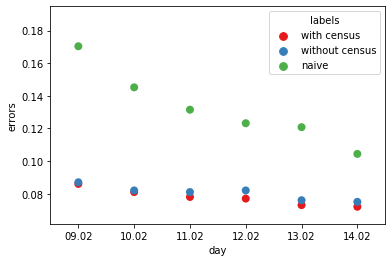

In [58]:
%matplotlib inline
sns.stripplot(x="day",y="errors",data=df,jitter=False,hue='labels',palette='Set1', size=8)
plt.draw()
plt.savefig('/home/mxenoc/workspace/covid-CA-forecasting/plots/census_comparison.png', dpi=500, bbox_inches='tight')